# Name of the data: `MC_constr_opposedCB_sharedMean`
# Fit of $m(D^*3\pi|m(D^*)=m(D^*)_{PDG})$ in MC

- Model: sum of two CB with shared mean


In [1]:
data_name = 'MC_constr_opposedCB_sharedMean' # MC corrected with the correct range
branch = 'Dst_constr_B0_M'

In [2]:
low = 5150.
high = 5400.

## Libraries

In [4]:
import numpy as np
import zfit

from bd2dst3pi.locations import loc
from bd2dst3pi.definition import years, magnets, latex_params_MC
from bd2dst3pi.pandas_root import load_data, add_constr_Dst

import sys
sys.path.append(loc.ROOT + 'library/')

from HEA.plot import plot_hist_auto
from HEA.plot.fit import plot_hist_fit_auto
from HEA.fit import json_to_latex_table, retrieve_params, show_latex_table
from HEA.fit.fit import launch_fit, sum_crystalball_or_gaussian_or_gaussian, save_params
from HEA.tools import show_dictionnary

## Retrieve data

In [5]:
df_MC = load_data(years,magnets,type_data = 'MC', vars = ['B0_M', 'Dst_M'], cut_DeltaM = True)
df_MC = add_constr_Dst(df_MC)

Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root
Delta_M > 143. and Delta_M < 148. cut has removed 0 over 23724 events


## Plot 1D histograms

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_MC_constr_opposedCB_sharedMean


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D^*)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (2.6 MeV/$c^2$)'>)

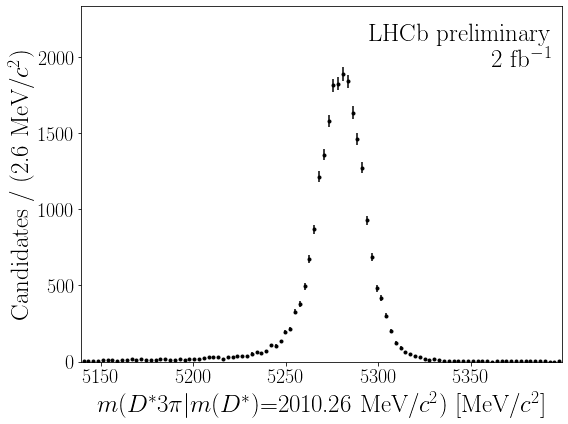

In [5]:
plot_hist_auto({data_name:df_MC}, branch, n_bins = 100, colors='black', pos_text_LHC='right')

##  Fit of $m(D^*3\pi|m(D^*)=m(D^*)_{PDG})$ in MC

In [6]:
obs = zfit.Space("x", limits=(low, high))

### Starting values of the parameters

In [7]:
# DOUBLE CB
# mu_MC = zfit.Parameter("mu_MC", 5280., 5250., 5300.)
# sigma_MC = zfit.Parameter("sigma_MC", 20., 10., 60.)


# alphaL_MC = zfit.Parameter("alphaL_MC", 2., 0.1, 5.)
# alphaR_MC = zfit.Parameter("alphaR_MC", 2., 0.1, 5.)
# nL_MC = zfit.Parameter("nL_MC", 2., 0.01, 10.)
# nR_MC = zfit.Parameter("nR_MC", 2., 0.01, 10.)
# frac_MC = zfit.Parameter("frac_MC", 0.5, 0.1, 1.)


# # Sum of two CB of opposite tails with shared mean
# # frac_MC     0.9481     +/-  0.0081       False
# # alphaL_MC    1.903     +/-   0.067       False
# # mu_MC         5280     +/-    0.11       False
# # nL_MC        1.541     +/-    0.14       False
# # sigmaL_MC    12.25     +/-    0.11       False
# # alphaR_MC    1.729     +/-    0.22       False
# # nR_MC        2.691     +/-     3.6       False
# # sigmaR_MC    35.56     +/-     2.2       False

mu_MC = zfit.Parameter("mu_MC", 5280., 5250., 5300.)
sigmaL_MC = zfit.Parameter("sigmaL_MC", 20., 10., 60.)
sigmaR_MC = zfit.Parameter("sigmaR_MC", 20., 10., 60.)

alphaL_MC = zfit.Parameter("alphaL_MC", 2., 0.1, 5.)
alphaR_MC = zfit.Parameter("alphaR_MC", -2., -5., -0.1)
nL_MC = zfit.Parameter("nL_MC", 2., 0.01, 10.)
nR_MC = zfit.Parameter("nR_MC", 2., 0.01, 50.)
frac_MC = zfit.Parameter("frac_MC", 0.5, 0.01, 1.)


# Sum of two CB of opposite tails
# frac_MC     0.9481     +/-  0.0081       False
# alphaL_MC    1.903     +/-   0.067       False
# mu_MC         5280     +/-    0.11       False
# nL_MC        1.541     +/-    0.14       False
# sigmaL_MC    12.25     +/-    0.11       False
# alphaR_MC    1.729     +/-    0.22       False
# nR_MC        2.691     +/-     3.6       False
# sigmaR_MC    35.56     +/-     2.2       False

# muL_MC = zfit.Parameter("muL_MC", 5280., 5250., 5300.)
# muR_MC = zfit.Parameter("muR_MC", 5280., 5250., 5300.)
# sigmaL_MC = zfit.Parameter("sigmaL_MC", 20., 10., 60.)
# sigmaR_MC = zfit.Parameter("sigmaR_MC", 20., 1., 60.)

# alphaL_MC = zfit.Parameter("alphaL_MC", 2., 0.1, 5.)
# alphaR_MC = zfit.Parameter("alphaR_MC", -2., -5., -0.1)
# nL_MC = zfit.Parameter("nL_MC", 2., 0.01, 10.)
# nR_MC = zfit.Parameter("nR_MC", 2., 0.01, 10.)
# frac_MC = zfit.Parameter("frac_MC", 0.5, 0.1, 1.)




### PDFs

In [15]:
# doubleCB_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)
data_MC = zfit.Data.from_pandas(df_MC[branch],obs=obs)

model_S, crystalBallL_S, crystalBallR_S = sum_crystalball_or_gaussian(mu_MC, mu_MC,
                                                          sigmaL_MC, sigmaR_MC,
                                                          frac_MC, obs,                                                          
                                                          alphaL_MC, alphaR_MC, 
                                                          nL_MC, nR_MC
                                                         )

# model_S, crystalBallL_S, crystalBallR_S = sum_crystalball_or_gaussian(muL_MC, muR_MC,
#                                                           sigmaL_MC, sigmaR_MC,
#                                                           frac_MC, obs,                                                          
#                                                           alphaL_MC, alphaR_MC, 
#                                                           nL_MC, nR_MC
#                                                          )

### Fit

In [16]:
# result, params = launch_fit(doubleCB_MC, data_MC)
# result, params = launch_fit(doubleCB_MC, data_MC)
# result, params = launch_fit(doubleCB_MC, data_MC)
result, params = launch_fit(model_S, data_MC)
result, params = launch_fit(model_S, data_MC)
result, params = launch_fit(model_S, data_MC)

------------------------------------------------------------------
| FCN = 9.928e+04               |     Ncalls=702 (702 total)     |
| EDM = 4.14e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse    at limit
---------  -------  --------------  ----------
frac_MC     0.6265     +/-    0.31       False
alphaL_MC    1.434     +/-    0.43       False
mu_MC   

Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.0233326
Info in Required Edm is : edmval = 0.001


### Result of the fit

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/fit.py:761: UserWarning: The function <function Space.limits at 0x7f04b08c5b90> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5400.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])


Number of bins: 80
Width of the bins: 3.125

Number of d.o.f. in the model:  8
Reduced chi2:  1.5202203782274362

Mean of the normalised residuals: -0.0962972690631125
Std of the normalised residuals: 1.1806808142355851


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//MC_constr_opposedCB_sharedMean/Dst_constr_B0_M_MC_constr_opposedCB_sharedMean_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D^*)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (3.12 MeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=1.52)', ylabel='residuals / $\\sigma$'>)

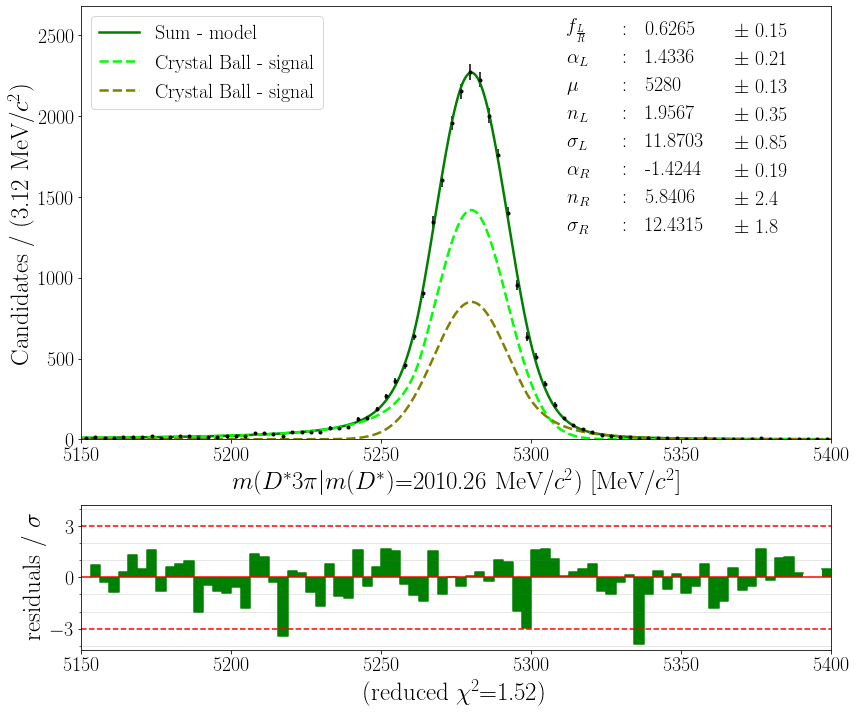

In [17]:
# plot_hist_fit_auto(df_MC,branch, models = doubleCB_MC, obs=obs, n_bins = 80, bar_mode = False,
#               data_name = data_name, params=params, latex_params=latex_params, show_chi2=True)
plot_hist_fit_auto(df_MC, branch, models = [model_S, crystalBallL_S, crystalBallR_S], 
                       models_names=["","",""], models_types='mss', colors=['green', 'lime', 'olive'],
                       obs=obs, n_bins = 80, bar_mode = False,
              data_name = data_name, params=params, latex_params=latex_params_MC, show_chi2=True)

Number of bins: 95
Width of the bins: 2.6315789473683253

Number of d.o.f. in the model:  8
Reduced chi2:  1.259290212869033

Mean of the normalised residuals: -0.06382118881796953
Std of the normalised residuals: 1.095382879534187
Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//MC_constr_opposedCB_sharedMean/Dst_constr_B0_M_MC_constr_opposedCB_sharedMean_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D^*)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (2.63 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

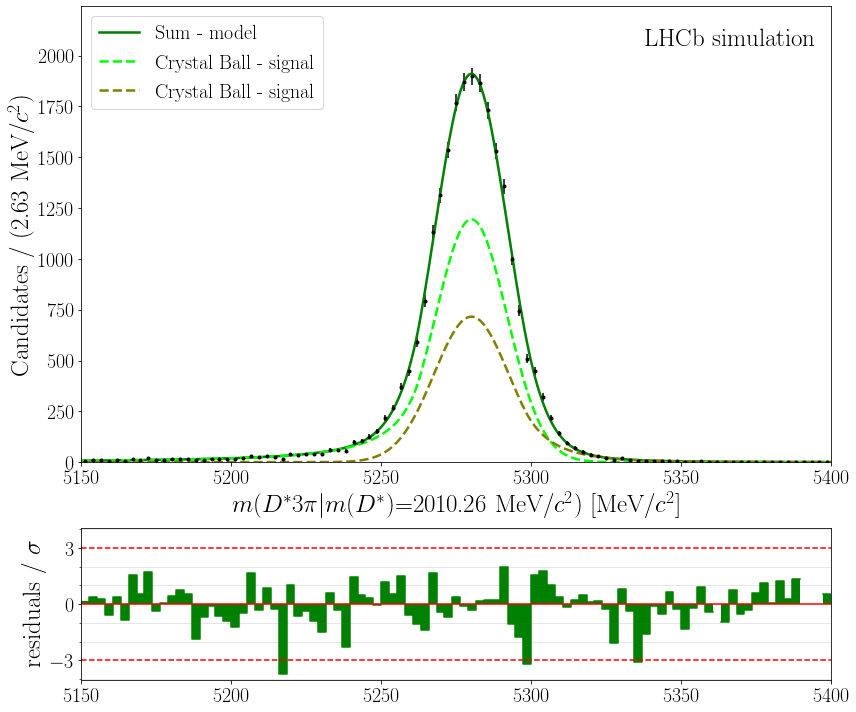

In [18]:
pos = {
    'ha' : 'right',
    'text' : 'LHCb simulation'
}

plot_hist_fit_auto(df_MC,branch, models = [model_S, crystalBallL_S, crystalBallR_S], 
                       models_names=['', '', ''],
                       models_types= 'mss', colors=['green', 'lime', 'olive'],
                       obs=obs, n_bins = 95, bar_mode = False,
                       data_name = data_name, pos_text_LHC=pos)


In [19]:
save_params(params, data_name, True, folder_name='MC')

Json file saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/test/MC_constr_opposedCB_sharedMean_params.json


In [20]:
json_to_latex_table(data_name, 'MC', latex_params_MC)

Latex table in /afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/MC/MC_constr_opposedCB_sharedMean_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\alpha_L$&$1.43\pm0.21$\\
\hline
$\alpha_R$&$-1.42\pm0.19$\\
\hline
$f_{\frac{L}{R}}$&$0.63\pm0.15$\\
\hline
$\mu$&$5280.03\pm0.13$\\
\hline
$n_L$&$1.96\pm0.35$\\
\hline
$n_R$&$5.8\pm2.4$\\
\hline
$\sigma_L$&$11.87\pm0.85$\\
\hline
$\sigma_R$&$12.4\pm1.8$\\
\hline
\end{tabular}


In [21]:
fitted_params = retrieve_params(data_name, folder_name='MC')

In [23]:
show_dictionnary(fitted_params)

alphaL_MC: 1.433605382929193
alphaL_MC_err: 0.205208204845077
alphaR_MC: -1.4243771075078335
alphaR_MC_err: 0.18596738945628238
frac_MC: 0.6265428034269498
frac_MC_err: 0.14808754795260973
mu_MC: 5280.029334833117
mu_MC_err: 0.12784933837259851
nL_MC: 1.9567213823685434
nL_MC_err: 0.34720813324599803
nR_MC: 5.840596424652496
nR_MC_err: 2.418176178376309
sigmaL_MC: 11.870261328699524
sigmaL_MC_err: 0.8508015260213404
sigmaR_MC: 12.431503310005523
sigmaR_MC_err: 1.8452371317350473
